<a href="https://colab.research.google.com/github/offthetab/NN_homework/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Свёрточная нейронная сеть CNN (теория)

---



## Задание 1
• Рассчитать результат свертки: размер входного изображения: 1024 x 1024. Какого размера получится результат свёртки 5 x 5, со страйдом ( 1 , 1 ), с паддингом ( 1 , 1 ) если на выходе
должно быть 44 каналов.

In [ ]:
def conv(image: list[int, int] = None, Ch_out: int = None, K: list[int, int] = None,
         S : list[int, int] = None, P : list[int, int] = None,):
  # image size
  if image is None:
    image = list(map(int, str(input("image size: ")).split(" ")))

  # amount of channels out
  if Ch_out is None:
    Ch_out = int(input("Ch_out: "))

  # kernel size
  if K is None:
    K = list(map(int, str(input("Kernel: ")).split(" ")))

  # stride size
  if S is None:
    S = list(map(int, str(input("Stride: ")).split(" ")))

  # padding size
  if P is None:
    P = list(map(int, str(input("Padding: ")).split(" ")))

  # computing image size out
  W_out = (image[0] - K[0] + 2 * P[0]) / S[0] + 1
  H_out = (image[1] - K[1] + 2 * P[1]) / S[1] + 1

  return Ch_out, W_out, H_out

# without args
# print("\nwithout args", conv())

# with args specification
print("\nwith args specification",
      conv(image=[1024, 1024], Ch_out=44, K=[5, 5], S=[1, 1], P=[1, 1]))


with args specification (44, 1022.0, 1022.0)



## Задание 2
Рассчитать результат свертки: размер входного изображения: 128 x 128. Какого размера получится
результат свёртки 9 x 9, со страйдом (1, 1), с паддингом (1, 1) если на
выходе должно быть 9 каналов.

In [ ]:
print(conv())

image size: 128 128
Ch_out: 9
Kernel: 9 9
Stride: 1 1
Padding: 1 1
(9, 122.0, 122.0)


## Задание 3

Найти количество параметров в свёрточной нейронной сети:


1.   conv2d(channels_input = 4 , channels_output = 4 kernel = ( 7 x 7 ), padding = 3 , stride = ( 3 , 3 ) maxpool
     
     conv2d(channels_input = 4 , channels_output = 6 kernel = ( 5 x 5 ), padding = 2 , stride = ( 1 , 1 )
maxpool

1 слой: 7 x 7 x 4 x 4 + 4 = 788
    
2 слой: 5 x 5 x 4 x 6 + 6 = 606

Итого: 788 + 606 = 1394


2.   conv2d(channels_input = 4 , channels_output = 4 kernel = ( 9 x 9 ), padding = 4 , stride = ( 2 , 2 ) maxpool
     
     conv2d(channels_input = 4 , channels_output = 6 kernel = ( 9 x 9 ), padding = 4 , stride = ( 4 , 4 ) maxpool
     
     conv2d(channels_input = 6 , channels_output = 7 kernel = ( 9 x 9 ), padding = 4 , stride = ( 1 , 1 ) maxpool
     
     conv2d(channels_input = 7 , channels_output = 8 kernel = ( 5 x 5 ), padding = 2 , stride = ( 2 , 2 ) maxpool

1 слой: 9 x 9 x 4 x 4 + 4 = 1300

2 слой: 9 x 9 x 4 x 6 + 6 = 1950

3 слой: 9 x 9 x 6 x 7 + 7 = 3409

4 слой: 5 x 5 x 7 x 8 + 8 = 1408

Итого: 1300 + 1950 + 3409 + 1408 = 8067




## Задание 4



*   Построить архитектуру сверточной нейронной сети LeNet для задачи классификации (данные, например, CIFAR10, можно и другие). Обучить модель.
*   Построить график ошибок для тестовой выборки для старого LeNet и с
разными новыми гиперпараметрами сети. Т.е. добавить ReLu, затем MaxPool, затем 2 свертки (3 x 3) вместо (5 x 5). То есть всего 4 графика на одном полотне.

*   Показать результат работы сети после обучения.




In [ ]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets
from torchvision.transforms import Compose, ToTensor, Normalize
from tqdm.notebook import tqdm

In [ ]:
num_epochs = 25
batch_size = 100
learning_rate = 0.001


transform = Compose([ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)



trainloader = th.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


testloader = th.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    with th.no_grad():                   # Не производить обратного подсчёта градиента, чтобы сеть не училась в процессе проверки
        for data, targets in loader:
            data = data.to(device)          # Перевод данных на ранее объявленное железо для просчёта всех вычислений
            targets = targets.to(device)    # Перевод целевых данных на карту
            preds = model(data)            # Прямое распространение информации по сети
            _, predictions = preds.max(1)  # Возвращаем позицию наибольшего выхода из сети
            num_correct += (predictions == targets).sum()       # Считаем количество правильных ответов
            num_samples += predictions.size(0)                  # Количество исходных данных
    model.train()
    return (int(num_correct) / int(num_samples))

# LeNet v1

In [ ]:
class LeNet_v1(th.nn.Module):
  def __init__(self):
    super(LeNet_v1, self).__init__()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv1 = th.nn.Conv2d(in_channels=3 , out_channels=6 , kernel_size=(5, 5),
                              stride=(1, 1))

    # Tanh
    self.act = th.nn.Tanh()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv2 = th.nn.Conv2d(in_channels=6 , out_channels=16 , kernel_size=(5, 5),
                              stride=(1, 1))

    # conv
    self.conv3 = th.nn.Conv2d(in_channels=16 , out_channels=120 , kernel_size=(5, 5),
                              stride=(1, 1))

    # AVGpool
    self.pool = th.nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))

    # linear
    self.fc1 = th.nn.Linear(120, 84)
    self.fc2 = th.nn.Linear(84, 10)

    # softmax
    self.sm = th.nn.Softmax(dim=1)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act(x)
    x = self.pool(x)

    x = self.conv2(x)
    x = self.act(x)
    x = self.pool(x)

    x = self.conv3(x)
    x = self.act(x)
    x = th.flatten(x, 1)

    x = self.fc1(x)
    x = self.act(x)

    x = self.fc2(x)
    return x

  def predict(self, x):
    with th.no_grad():
      x = self.forward(x)
      x = x.reshape(1, -1)
      x = self.sm(x)
    return x

net = LeNet_v1()

In [ ]:
device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')

# перекладываем сеть на GPU
net = net.to(device)

In [ ]:
# функция потерь
loss = th.nn.CrossEntropyLoss() # Кросс-энтропия
opt = th.optim.Adam(net.parameters(), lr=learning_rate) # #оптимизатор

In [ ]:
loss_lst_v1 = []
test_loss_lst_v1 = []
train_acc_v1 = []
test_acc_v1 = []

for epoch in tqdm(range(num_epochs)):
    losses = [] # список ошибок по эпохам

    for batch_id, (data, targets) in enumerate(trainloader):
        opt.zero_grad()
        # передаем на cudu
        data, targets = data.to(device), targets.to(device)

        preds = net(data)

        loss_value = loss(preds, targets)

        losses.append(loss_value.item())

        loss_value.backward()
        opt.step()

    #train loss записываем в список
    current_loss = sum(losses) / len(losses)
    loss_lst_v1.append(current_loss)


    # выводим loss на тестовых данных
    net.eval()
    with th.no_grad():
        testloss = 0
        for data, targets in testloader:
            data, targets = data.to(device), targets.to(device)
            preds = net(data)
            lossvalue = loss(preds, targets)
            testloss += lossvalue.item()

        avg_batch_loss = testloss / len(testloader)
        test_loss_lst_v1.append(avg_batch_loss)

        # печать на экран train и test loss
        print(f"epoch: {epoch + 1}; train loss: {current_loss}; test_loss: {avg_batch_loss}")


    # заполняем список accuracy
    train_acc_v1.append(check_accuracy(trainloader, net))
    test_acc_v1.append(check_accuracy(testloader, net))


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch: 1; train loss: 1.8790293862819671; test_loss: 1.7457855725288391
epoch: 2; train loss: 1.6811057946681975; test_loss: 1.6325751006603242
epoch: 3; train loss: 1.543810720682144; test_loss: 1.5090951204299927
epoch: 4; train loss: 1.4484519827365876; test_loss: 1.425519472360611
epoch: 5; train loss: 1.37862171125412; test_loss: 1.386816349029541
epoch: 6; train loss: 1.3293757894039153; test_loss: 1.368202360868454
epoch: 7; train loss: 1.2834260514974594; test_loss: 1.3367655551433564
epoch: 8; train loss: 1.2472331674098969; test_loss: 1.3333139729499817
epoch: 9; train loss: 1.2121718279123306; test_loss: 1.308779811859131
epoch: 10; train loss: 1.179666744351387; test_loss: 1.3030769997835159
epoch: 11; train loss: 1.1494138445854187; test_loss: 1.2954936772584915
epoch: 12; train loss: 1.1251555601358414; test_loss: 1.2993518280982972
epoch: 13; train loss: 1.1009040706157684; test_loss: 1.2988699924945832
epoch: 14; train loss: 1.0766916946172713; test_loss: 1.314586535692

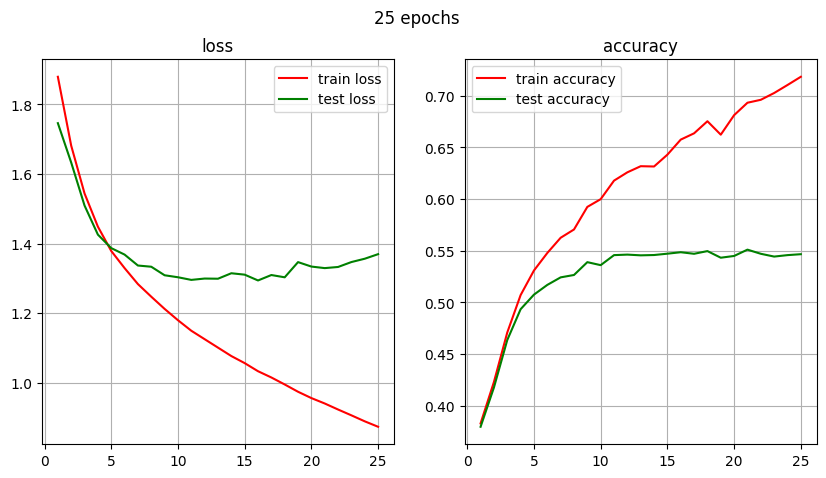

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('25 epochs')

ax[0].plot(np.arange(1, len(loss_lst_v1)+1), loss_lst_v1, color='red', label='train loss')
ax[0].plot(np.arange(1, len(loss_lst_v1)+1), test_loss_lst_v1, color='green', label='test loss')
ax[0].set_title("loss")
ax[0].legend()
ax[0].grid()

epochs = np.arange(1, len(loss_lst_v1)+1)
ax[1].plot(epochs, train_acc_v1, color='red', label='train accuracy')
ax[1].plot(epochs, test_acc_v1, color='green', label='test accuracy')
ax[1].set_title("accuracy")
ax[1].legend()
ax[1].grid()

# LeNet v2 with ReLu

In [ ]:
class LeNet_v2(th.nn.Module):
  def __init__(self):
    super(LeNet_v2, self).__init__()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv1 = th.nn.Conv2d(in_channels=3 , out_channels=6 , kernel_size=(5, 5),
                              stride=(1, 1))

    # Tanh
    self.act = th.nn.ReLU()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv2 = th.nn.Conv2d(in_channels=6 , out_channels=16 , kernel_size=(5, 5),
                              stride=(1, 1))

    # conv
    self.conv3 = th.nn.Conv2d(in_channels=16 , out_channels=120 , kernel_size=(5, 5),
                              stride=(1, 1))

    # AVGpool
    self.pool = th.nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))

    # linear
    self.fc1 = th.nn.Linear(120, 84)
    self.fc2 = th.nn.Linear(84, 10)

    # softmax
    self.sm = th.nn.Softmax(dim=1)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act(x)
    x = self.pool(x)

    x = self.conv2(x)
    x = self.act(x)
    x = self.pool(x)

    x = self.conv3(x)
    x = self.act(x)
    x = th.flatten(x, 1)

    x = self.fc1(x)
    x = self.act(x)

    x = self.fc2(x)
    return x

  def predict(self, x):
    with th.no_grad():
      x = self.forward(x)
      x = x.reshape(1, -1)
      x = self.sm(x)
    return x

net_v2 = LeNet_v2()

In [ ]:
device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')

# перекладываем сеть на GPU
net_v2 = net_v2.to(device)

In [ ]:
# функция потерь
loss = th.nn.CrossEntropyLoss() # Кросс-энтропия
opt = th.optim.Adam(net_v2.parameters(), lr=learning_rate) # #оптимизатор

In [ ]:
loss_lst_v2 = []
test_loss_lst_v2 = []
train_acc_v2 = []
test_acc_v2 = []

for epoch in tqdm(range(num_epochs)):
    losses = [] # список ошибок по эпохам

    for batch_id, (data, targets) in enumerate(trainloader):
        opt.zero_grad()
        # передаем на cudu
        data, targets = data.to(device), targets.to(device)

        preds = net_v2(data)

        loss_value = loss(preds, targets)

        losses.append(loss_value.item())

        loss_value.backward()
        opt.step()

    # train loss записываем в список
    current_loss = sum(losses) / len(losses)
    loss_lst_v2.append(current_loss)


    # test loss
    net_v2.eval()
    testloss = 0
    with th.no_grad():
        for data, targets in testloader:
            data, targets = data.to(device), targets.to(device)
            preds = net_v2(data)
            lossvalue = loss(preds, targets)
            testloss += lossvalue.item()

        avg_batch_loss = testloss / len(testloader)
        test_loss_lst_v2.append(avg_batch_loss)

        # печать на экран train и test loss
        print(f"epoch: {epoch + 1}; train loss: {current_loss}; test_loss: {avg_batch_loss}")

    # заполняем список accuracy
    train_acc_v2.append(check_accuracy(trainloader, net_v2))
    test_acc_v2.append(check_accuracy(testloader, net_v2))

  0%|          | 0/25 [00:00<?, ?it/s]

epoch: 1; train loss: 1.8306110494136811; test_loss: 1.6205846309661864
epoch: 2; train loss: 1.5702070667743684; test_loss: 1.5196783220767975
epoch: 3; train loss: 1.4764654490947724; test_loss: 1.4621525859832765
epoch: 4; train loss: 1.4053022644519806; test_loss: 1.3698965573310853
epoch: 5; train loss: 1.3517443742752075; test_loss: 1.3410032391548157
epoch: 6; train loss: 1.3068040410280228; test_loss: 1.3286586833000182
epoch: 7; train loss: 1.270691251039505; test_loss: 1.2742868232727051
epoch: 8; train loss: 1.2313096029758452; test_loss: 1.3204650259017945
epoch: 9; train loss: 1.2081233404874803; test_loss: 1.2626759910583496
epoch: 10; train loss: 1.1723727703094482; test_loss: 1.2182876068353652
epoch: 11; train loss: 1.1476005675792693; test_loss: 1.239176003932953
epoch: 12; train loss: 1.1213903195858002; test_loss: 1.2077219706773759
epoch: 13; train loss: 1.1002495793104172; test_loss: 1.20921422123909
epoch: 14; train loss: 1.0752538625001908; test_loss: 1.20548355

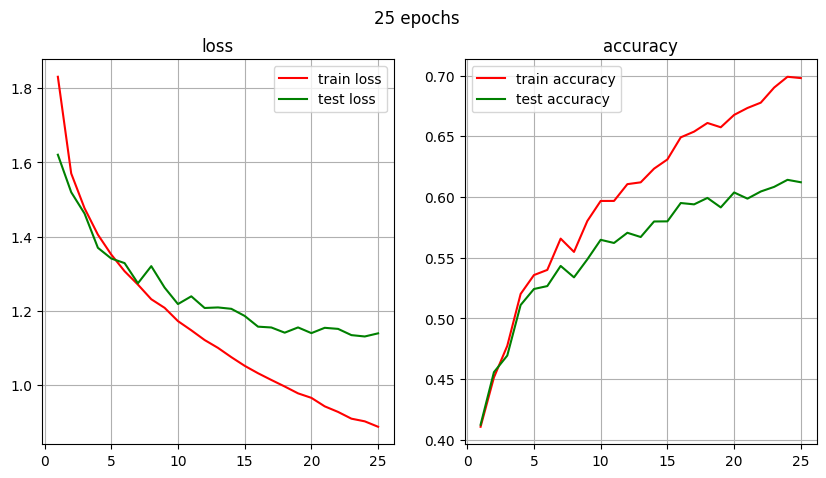

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('25 epochs')

ax[0].plot(np.arange(1, len(loss_lst_v2)+1), loss_lst_v2, color='red', label='train loss')
ax[0].plot(np.arange(1, len(loss_lst_v1)+1), test_loss_lst_v2, color='green', label='test loss')
ax[0].set_title("loss")
ax[0].legend()
ax[0].grid()

epochs = np.arange(1, len(loss_lst_v2)+1)
ax[1].plot(epochs, train_acc_v2, color='red', label='train accuracy')
ax[1].plot(epochs, test_acc_v2, color='green', label='test accuracy')
ax[1].set_title("accuracy")
ax[1].legend()
ax[1].grid()

# LeNet v3 with MaxPool



In [ ]:
class LeNet_v3(th.nn.Module):
  def __init__(self):
    super(LeNet_v3, self).__init__()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv1 = th.nn.Conv2d(in_channels=3 , out_channels=6 , kernel_size=(5, 5),
                              stride=(1, 1))

    # Tanh
    self.act = th.nn.ReLU()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv2 = th.nn.Conv2d(in_channels=6 , out_channels=16 , kernel_size=(5, 5),
                              stride=(1, 1))

    # conv
    self.conv3 = th.nn.Conv2d(in_channels=16 , out_channels=120 , kernel_size=(5, 5),
                              stride=(1, 1))

    # AVGpool
    self.pool = th.nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

    # linear
    self.fc1 = th.nn.Linear(120, 84)
    self.fc2 = th.nn.Linear(84, 10)

    # softmax
    self.sm = th.nn.Softmax(dim=1)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act(x)
    x = self.pool(x)

    x = self.conv2(x)
    x = self.act(x)
    x = self.pool(x)

    x = self.conv3(x)
    x = self.act(x)
    x = th.flatten(x, 1)

    x = self.fc1(x)
    x = self.act(x)

    x = self.fc2(x)
    return x

  def predict(self, x):
    with th.no_grad():
      x = self.forward(x)
      x = x.reshape(1, -1)
      x = self.sm(x)
    return x

net_v3 = LeNet_v3()

In [ ]:
device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')

# перекладываем сеть на GPU
net_v3 = net_v3.to(device)

In [ ]:
# функция потерь
loss = th.nn.CrossEntropyLoss() # Кросс-энтропия
opt = th.optim.Adam(net_v3.parameters(), lr=learning_rate) # #оптимизатор

In [ ]:
loss_lst_v3 = []
test_loss_lst_v3 = []
train_acc_v3 = []
test_acc_v3 = []

for epoch in tqdm(range(num_epochs)):
    losses = [] # список ошибок по эпохам

    for batch_id, (data, targets) in enumerate(trainloader):
        opt.zero_grad()
        # передаем на cudu
        data, targets = data.to(device), targets.to(device)

        preds = net_v3(data)

        loss_value = loss(preds, targets)

        losses.append(loss_value.item())

        loss_value.backward()
        opt.step()

    # train loss записываем в список
    current_loss = sum(losses) / len(losses)
    loss_lst_v3.append(current_loss)

    # test loss
    net_v3.eval()
    testloss = 0
    with th.no_grad():
        for data, targets in testloader:
            data, targets = data.to(device), targets.to(device)
            preds = net_v3(data)
            lossvalue = loss(preds, targets)
            testloss += lossvalue.item()

        avg_batch_loss = testloss / len(testloader)
        test_loss_lst_v3.append(avg_batch_loss)

        # печать на экран train и test loss
        print(f"epoch: {epoch + 1}; train loss: {current_loss}; test_loss: {avg_batch_loss}")

    # заполняем список accuracy
    train_acc_v3.append(check_accuracy(trainloader, net_v3))
    test_acc_v3.append(check_accuracy(testloader, net_v3))

  0%|          | 0/25 [00:00<?, ?it/s]

epoch: 1; train loss: 1.8691397609710694; test_loss: 1.637494113445282
epoch: 2; train loss: 1.5742781555652618; test_loss: 1.498007606267929
epoch: 3; train loss: 1.4639345541000366; test_loss: 1.4307986211776733
epoch: 4; train loss: 1.3754231147766114; test_loss: 1.348577276468277
epoch: 5; train loss: 1.3087230060100556; test_loss: 1.3387287211418153
epoch: 6; train loss: 1.2487182301282882; test_loss: 1.2700347471237183
epoch: 7; train loss: 1.2022704433202744; test_loss: 1.2620815354585648
epoch: 8; train loss: 1.1619580259323121; test_loss: 1.2124368786811828
epoch: 9; train loss: 1.1245685720443725; test_loss: 1.203143277168274
epoch: 10; train loss: 1.0966298135519028; test_loss: 1.1673836922645568
epoch: 11; train loss: 1.0698709398508073; test_loss: 1.1448230969905853
epoch: 12; train loss: 1.0476750998497009; test_loss: 1.1676135087013244
epoch: 13; train loss: 1.0240595366954803; test_loss: 1.1594342809915543
epoch: 14; train loss: 1.0070276317596436; test_loss: 1.13848914

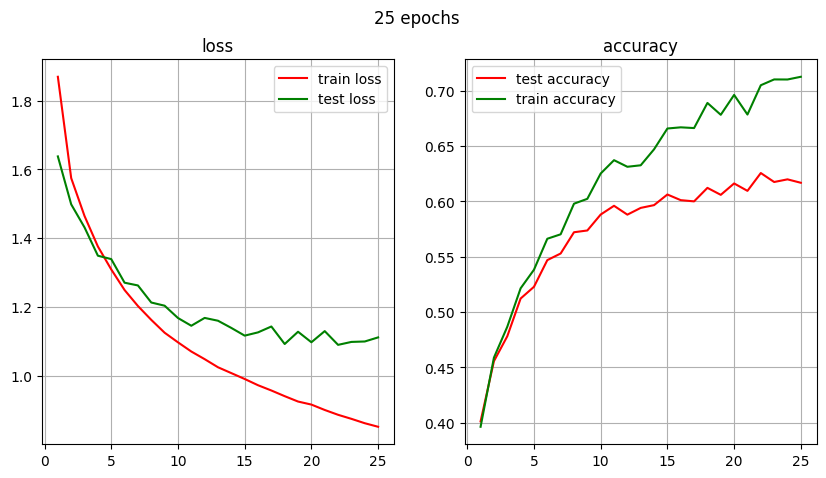

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('25 epochs')

ax[0].plot(np.arange(1, len(loss_lst_v3)+1), loss_lst_v3, color='red', label='train loss')
ax[0].plot(np.arange(1, len(loss_lst_v3)+1), test_loss_lst_v3, color='green', label='test loss')
ax[0].set_title("loss")
ax[0].legend()
ax[0].grid()

epochs = np.arange(1, len(loss_lst_v3)+1)
ax[1].plot(epochs, test_acc_v3, color='red', label='test accuracy')
ax[1].plot(epochs, train_acc_v3, color='green', label='train accuracy')
ax[1].set_title("accuracy")
ax[1].legend()
ax[1].grid()

# LeNet v4 with two 3x3 conv instead of one 5x5

In [ ]:
class LeNet_v4(th.nn.Module):
  def __init__(self):
    super(LeNet_v4, self).__init__()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv1_1 = th.nn.Conv2d(in_channels=3 , out_channels=6 , kernel_size=(3, 3),
                              stride=(1, 1))

    self.conv1_2 = th.nn.Conv2d(in_channels=6 , out_channels=6 , kernel_size=(3, 3),
                              stride=(1, 1))

    # Tanh
    self.act = th.nn.ReLU()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv2_1 = th.nn.Conv2d(in_channels=6 , out_channels=16 , kernel_size=(3, 3),
                              stride=(1, 1))

    self.conv2_2 = th.nn.Conv2d(in_channels=16 , out_channels=16 , kernel_size=(3, 3),
                              stride=(1, 1))

    # conv
    self.conv3 = th.nn.Conv2d(in_channels=16 , out_channels=120 , kernel_size=(5, 5),
                              stride=(1, 1))

    # AVGpool
    self.pool = th.nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

    # linear
    self.fc1 = th.nn.Linear(120, 84)
    self.fc2 = th.nn.Linear(84, 10)

    # softmax
    self.sm = th.nn.Softmax(dim=1)

  def forward(self, x):
    x = self.conv1_2(self.conv1_1(x))
    x = self.act(x)
    x = self.pool(x)

    x = self.conv2_2(self.conv2_1(x))
    x = self.act(x)
    x = self.pool(x)

    x = self.conv3(x)
    x = self.act(x)
    x = th.flatten(x, 1)

    x = self.fc1(x)
    x = self.act(x)

    x = self.fc2(x)
    return x

  def predict(self, x):
    with th.no_grad():
      x = self.forward(x)
      x = x.reshape(1, -1)
      x = self.sm(x)
    return x

net_v4 = LeNet_v4()

In [ ]:
device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')

# перекладываем сеть на GPU
net_v4 = net_v4.to(device)

In [ ]:
# функция потерь
loss = th.nn.CrossEntropyLoss() # Кросс-энтропия
opt = th.optim.Adam(net_v4.parameters(), lr=learning_rate) # #оптимизатор

In [ ]:
loss_lst_v4 = []
test_loss_lst_v4 = []
train_acc_v4 = []
test_acc_v4 = []

for epoch in tqdm(range(num_epochs)):
    losses = [] # список ошибок по эпохам

    for batch_id, (data, targets) in enumerate(trainloader):
        opt.zero_grad()
        # передаем на cudu
        data, targets = data.to(device), targets.to(device)

        preds = net_v4(data)

        loss_value = loss(preds, targets)

        losses.append(loss_value.item())

        loss_value.backward()
        opt.step()

    # train loss записываем в список
    current_loss = sum(losses) / len(losses)
    loss_lst_v4.append(current_loss)

    # test loss
    net_v4.eval()
    testloss = 0
    with th.no_grad():
        for data, targets in testloader:
            data, targets = data.to(device), targets.to(device)
            preds = net_v4(data)
            lossvalue = loss(preds, targets)
            testloss += lossvalue.item()

        avg_batch_loss = testloss / len(testloader)
        test_loss_lst_v4.append(avg_batch_loss)

        # печать на экран train и test loss
        print(f"epoch: {epoch + 1}; train loss: {current_loss}; test_loss: {avg_batch_loss}")

    # заполняем список accuracy
    train_acc_v4.append(check_accuracy(trainloader, net_v4))
    test_acc_v4.append(check_accuracy(testloader, net_v4))

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch: 1; train loss: 1.8354874048233032; test_loss: 1.5831721377372743
epoch: 2; train loss: 1.4851951146125792; test_loss: 1.4104508757591248
epoch: 3; train loss: 1.3703977816104889; test_loss: 1.3213019180297851
epoch: 4; train loss: 1.2850558018684388; test_loss: 1.2567783355712892
epoch: 5; train loss: 1.217202095389366; test_loss: 1.2209438127279282
epoch: 6; train loss: 1.1530017614364625; test_loss: 1.2028697872161864
epoch: 7; train loss: 1.1026118530035018; test_loss: 1.1241454112529754
epoch: 8; train loss: 1.0497790220975876; test_loss: 1.111783385872841
epoch: 9; train loss: 0.9998317484855652; test_loss: 1.0681349271535874
epoch: 10; train loss: 0.9607282543182373; test_loss: 1.0563187843561173
epoch: 11; train loss: 0.9221165083646774; test_loss: 1.0593682593107223
epoch: 12; train loss: 0.8886960334777833; test_loss: 1.0313851314783096
epoch: 13; train loss: 0.8607100851535797; test_loss: 1.0200675839185716
epoch: 14; train loss: 0.833963339984417; test_loss: 1.0401896

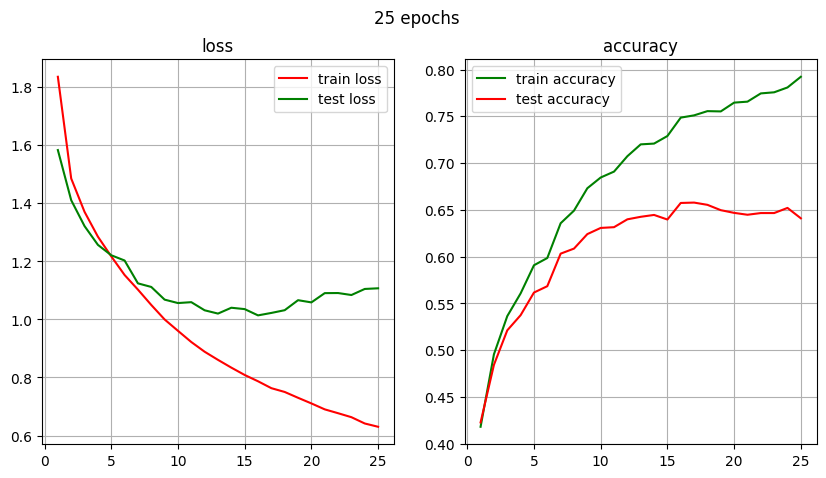

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('25 epochs')

ax[0].plot(np.arange(1, len(loss_lst_v4)+1), loss_lst_v4, color='red', label='train loss')
ax[0].plot(np.arange(1, len(loss_lst_v4)+1), test_loss_lst_v4, color='green', label='test loss')
ax[0].set_title("loss")
ax[0].legend()
ax[0].grid()

epochs = np.arange(1, len(loss_lst_v4)+1)
ax[1].plot(epochs, train_acc_v4, color='green', label='train accuracy')
ax[1].plot(epochs, test_acc_v4, color='red', label='test accuracy')
ax[1].set_title("accuracy")
ax[1].legend()
ax[1].grid()

# Сравнение 4 моделей

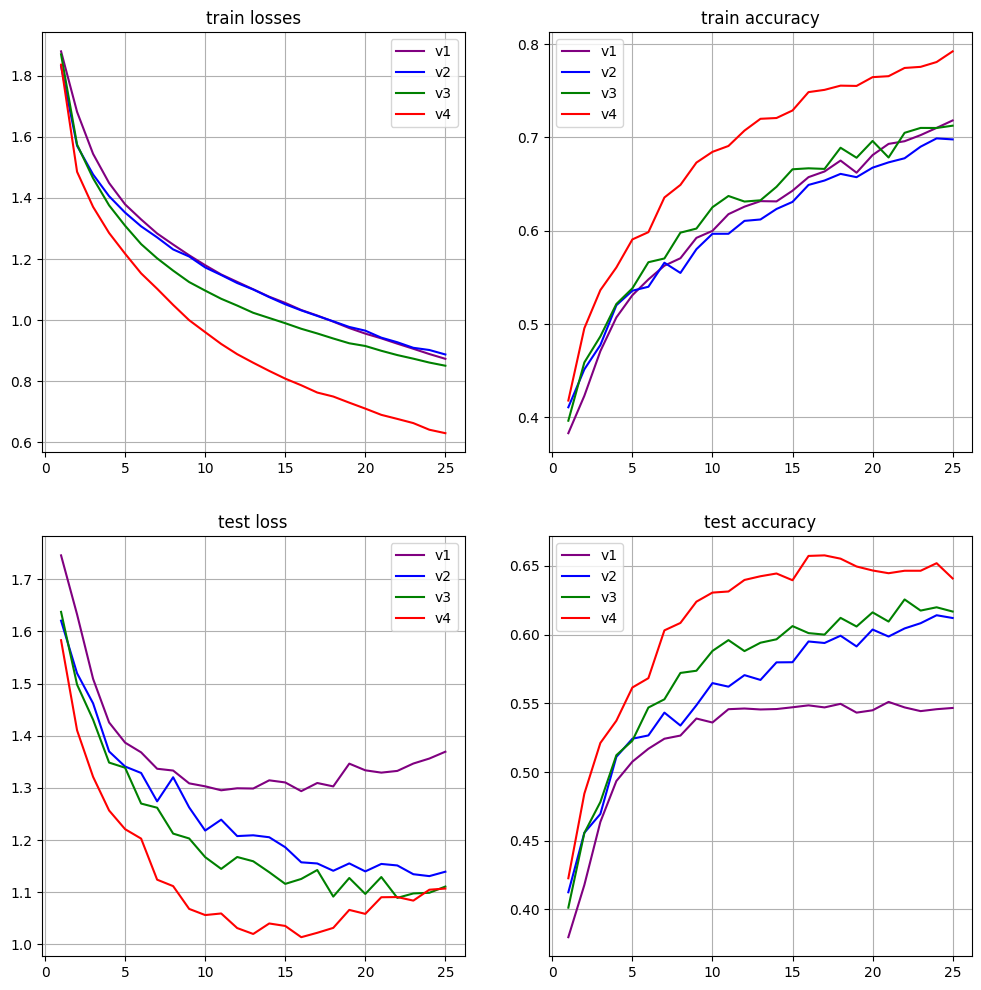

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
epochs = np.arange(1, len(loss_lst_v4)+1)

ax[0][0].plot(epochs, loss_lst_v1, color='purple', label='v1')
ax[0][0].plot(epochs, loss_lst_v2, color='blue', label='v2')
ax[0][0].plot(epochs, loss_lst_v3, color='green', label='v3')
ax[0][0].plot(epochs, loss_lst_v4, color='red', label='v4')
ax[0][0].set_title("train losses")
ax[0][0].legend()
ax[0][0].grid()


ax[0][1].plot(epochs, train_acc_v1, color='purple', label='v1')
ax[0][1].plot(epochs, train_acc_v2, color='blue', label='v2')
ax[0][1].plot(epochs, train_acc_v3, color='green', label='v3')
ax[0][1].plot(epochs, train_acc_v4, color='red', label='v4')
ax[0][1].set_title("train accuracy")
ax[0][1].legend()
ax[0][1].grid()


ax[1][0].plot(epochs, test_loss_lst_v1, color='purple', label='v1')
ax[1][0].plot(epochs, test_loss_lst_v2, color='blue', label='v2')
ax[1][0].plot(epochs, test_loss_lst_v3, color='green', label='v3')
ax[1][0].plot(epochs, test_loss_lst_v4, color='red', label='v4')
ax[1][0].set_title("test loss")
ax[1][0].legend()
ax[1][0].grid()


ax[1][1].plot(epochs, test_acc_v1, color='purple', label='v1')
ax[1][1].plot(epochs, test_acc_v2, color='blue', label='v2')
ax[1][1].plot(epochs, test_acc_v3, color='green', label='v3')
ax[1][1].plot(epochs, test_acc_v4, color='red', label='v4')
ax[1][1].set_title("test accuracy")
ax[1][1].legend()
ax[1][1].grid()

# Аугментация данных и обучение лучшей вариации LeNet

In [ ]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torch.utils.data as data
from torchvision.transforms import Compose, ToTensor, Normalize, RandomHorizontalFlip, ColorJitter, RandomAffine
from tqdm.notebook import tqdm

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # случайное отражение по горизонтали
    transforms.RandomRotation(10),  # случайный поворот на угол до 10 градусов
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # изменение яркости, контраста, насыщенности и оттенка
    transforms.ToTensor()  # преобразование в тензор
])

num_epochs = 60
batch_size = 100
learning_rate = 0.001

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = th.utils.data.DataLoader(trainset, batch_size=batch_size,
                                       shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = th.utils.data.DataLoader(testset, batch_size=batch_size,
                                      shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class LeNet_v4_(th.nn.Module):
  def __init__(self):
    super(LeNet_v4_, self).__init__()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv1_1 = th.nn.Conv2d(in_channels=3 , out_channels=6 , kernel_size=(3, 3),
                              stride=(1, 1))

    self.conv1_2 = th.nn.Conv2d(in_channels=6 , out_channels=6 , kernel_size=(3, 3),
                              stride=(1, 1))

    # Tanh
    self.act = th.nn.ReLU()

    # conv ch_in: 3, ch_out: 6, kernel: (5 x 5), padding (2 x 2) stride (1 x 1)
    self.conv2_1 = th.nn.Conv2d(in_channels=6 , out_channels=16 , kernel_size=(3, 3),
                              stride=(1, 1))

    self.conv2_2 = th.nn.Conv2d(in_channels=16 , out_channels=16 , kernel_size=(3, 3),
                              stride=(1, 1))

    # conv
    self.conv3 = th.nn.Conv2d(in_channels=16 , out_channels=120 , kernel_size=(5, 5),
                              stride=(1, 1))

    # AVGpool
    self.pool = th.nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

    # linear
    self.fc1 = th.nn.Linear(120, 84)
    self.fc2 = th.nn.Linear(84, 10)

    # softmax
    self.sm = th.nn.Softmax(dim=1)

  def forward(self, x):
    x = self.conv1_2(self.conv1_1(x))
    x = self.act(x)
    x = self.pool(x)

    x = self.conv2_2(self.conv2_1(x))
    x = self.act(x)
    x = self.pool(x)

    x = self.conv3(x)
    x = self.act(x)
    x = th.flatten(x, 1)

    x = self.fc1(x)
    x = self.act(x)

    x = self.fc2(x)
    return x

  def predict(self, x):
    with th.no_grad():
      x = self.forward(x)
      x = x.reshape(1, -1)
      x = self.sm(x)
    return x

net_v4_ = LeNet_v4_()

In [ ]:
device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')

# перекладываем сеть на GPU
net_v4_ = net_v4_.to(device)

In [ ]:
# функция потерь
loss = th.nn.CrossEntropyLoss() # Кросс-энтропия
opt = th.optim.Adam(net_v4_.parameters(), lr=learning_rate) # #оптимизатор

In [ ]:
loss_lst_v5 = []
test_loss_lst_v5 = []
train_acc_v5 = []
test_acc_v5 = []

for epoch in tqdm(range(num_epochs)):
    losses = [] # список ошибок по эпохам

    for batch_id, (data, targets) in enumerate(trainloader):
        opt.zero_grad()
        # передаем на cudu
        data, targets = data.to(device), targets.to(device)

        preds = net_v4_(data)

        loss_value = loss(preds, targets)

        losses.append(loss_value.item())

        loss_value.backward()
        opt.step()

    # train loss записываем в список
    current_loss = sum(losses) / len(losses)
    loss_lst_v5.append(current_loss)

    # test loss
    net_v4_.eval()
    testloss = 0
    with th.no_grad():
        for data, targets in testloader:
            data, targets = data.to(device), targets.to(device)
            preds = net_v4_(data)
            lossvalue = loss(preds, targets)
            testloss += lossvalue.item()

        avg_batch_loss = testloss / len(testloader)
        test_loss_lst_v5.append(avg_batch_loss)

        # печать на экран train и test loss
        print(f"epoch: {epoch + 1}; train loss: {current_loss}; test_loss: {avg_batch_loss}")

    # заполняем список accuracy
    train_acc_v5.append(check_accuracy(trainloader, net_v4_))
    test_acc_v5.append(check_accuracy(testloader, net_v4_))

  0%|          | 0/60 [00:00<?, ?it/s]

epoch: 1; train loss: 1.9917547523975372; test_loss: 1.7745344352722168
epoch: 2; train loss: 1.6934175240993499; test_loss: 1.5919307637214661
epoch: 3; train loss: 1.5488907964229583; test_loss: 1.4924305033683778
epoch: 4; train loss: 1.4714378192424775; test_loss: 1.4508038651943207
epoch: 5; train loss: 1.4077831864356996; test_loss: 1.3859452152252196
epoch: 6; train loss: 1.3556735062599181; test_loss: 1.347833423614502
epoch: 7; train loss: 1.3083860111236572; test_loss: 1.3121013039350509
epoch: 8; train loss: 1.2661092278957367; test_loss: 1.2570696699619293
epoch: 9; train loss: 1.2434300801753997; test_loss: 1.2418655133247376
epoch: 10; train loss: 1.2162722808122635; test_loss: 1.252388687133789
epoch: 11; train loss: 1.1855849740505218; test_loss: 1.218179516196251
epoch: 12; train loss: 1.1651028909683228; test_loss: 1.2177121257781982
epoch: 13; train loss: 1.1453287385702133; test_loss: 1.186960105895996
epoch: 14; train loss: 1.1318607214689256; test_loss: 1.18267527

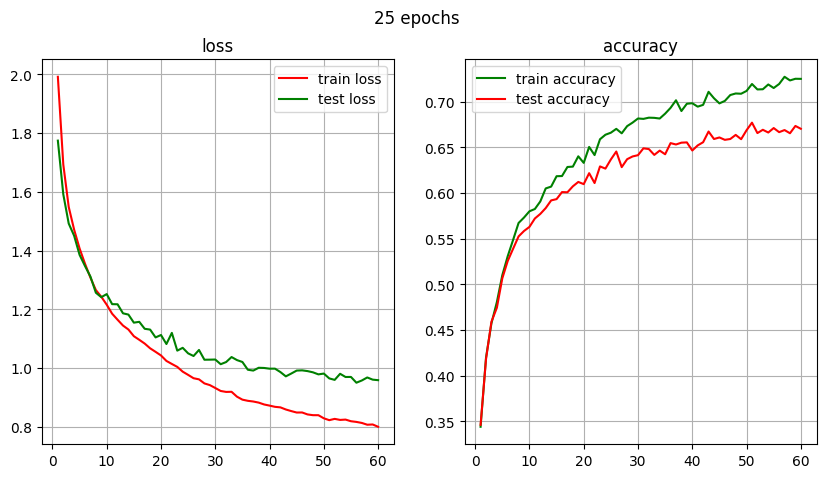

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('25 epochs')

ax[0].plot(np.arange(1, len(loss_lst_v5)+1), loss_lst_v5, color='red', label='train loss')
ax[0].plot(np.arange(1, len(loss_lst_v5)+1), test_loss_lst_v5, color='green', label='test loss')
ax[0].set_title("loss")
ax[0].legend()
ax[0].grid()

epochs = np.arange(1, len(loss_lst_v5)+1)
ax[1].plot(epochs, train_acc_v5, color='green', label='train accuracy')
ax[1].plot(epochs, test_acc_v5, color='red', label='test accuracy')
ax[1].set_title("accuracy")
ax[1].legend()
ax[1].grid()